# <span style='color:gray'> Business Cases with Data Science MDSAA-BA  </span>
### <span style='color:green'> Business Case 3 - 2020/2021 </span>

**GROUP Z:** <br>
- Ana Paulino (20170743) <br>
- Carolina Pina (20170790) <br>
- Soraia Cunha (20170806)

In [1]:
#!pip install mlextend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx

### Data Understanding

In [3]:
# Import order product dataset
df = pd.read_csv(r'order_products.csv')
print(df.head())
print(df.shape)

   order_id  product_id  add_to_cart_order  reordered
0        10          24                  1          1
1        10          83                  2          1
2        10          16                  3          0
3        10          24                  4          1
4        10          83                  5          1
(2019501, 4)


In [4]:
# Import product label mapping
products = pd.read_csv(r'products.csv')
print(products.head())
print(products.shape)

   product_id  department_id                product_name
0          61             19               cookies cakes
1         104             13           spices seasonings
2          94              7                         tea
3          38              1                frozen meals
4           5             13  marinades meat preparation
(134, 3)


In [5]:
departments = pd.read_csv(r'departments.csv')
print(departments.head())
print(departments.shape)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
(21, 2)


In [6]:
orders = pd.read_csv(r'orders.csv')
print(orders.head())
print(orders.shape)

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   1944304   162867             1          3                 17   
2   1201011   147243            14          0                 16   
3   1906860   195275            81          1                 11   
4   2766469    58222             3          6                 11   

   days_since_prior_order  
0                     NaN  
1                     NaN  
2                     3.0  
3                     3.0  
4                     6.0  
(200000, 6)


In [7]:
orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    12254
dtype: int64

In [8]:
round(orders.mean(),3)

order_id                  1710074.880
user_id                    103150.316
order_number                   17.145
order_dow                       2.776
order_hour_of_day              13.459
days_since_prior_order         11.000
dtype: float64

In [9]:
# Merging dataframes
prod_dep = pd.merge(products,departments, how='left', on='department_id')
print(prod_dep.head())
print(prod_dep.shape)

   product_id  department_id                product_name department
0          61             19               cookies cakes     snacks
1         104             13           spices seasonings     pantry
2          94              7                         tea  beverages
3          38              1                frozen meals     frozen
4           5             13  marinades meat preparation     pantry
(134, 4)


In [10]:
df = pd.merge(df, prod_dep, how='left', on='product_id')
print(df.head())
print(df.shape)

   order_id  product_id  add_to_cart_order  reordered  department_id  \
0        10          24                  1          1              4   
1        10          83                  2          1              4   
2        10          16                  3          0              4   
3        10          24                  4          1              4   
4        10          83                  5          1              4   

       product_name department  
0      fresh fruits    produce  
1  fresh vegetables    produce  
2       fresh herbs    produce  
3      fresh fruits    produce  
4  fresh vegetables    produce  
(2019501, 7)


In [11]:
extra_merge = pd.merge(df, orders, how='left', on='order_id').drop("days_since_prior_order", axis=1)
print(extra_merge.head())
print(extra_merge.shape)

   order_id  product_id  add_to_cart_order  reordered  department_id  \
0        10          24                  1          1              4   
1        10          83                  2          1              4   
2        10          16                  3          0              4   
3        10          24                  4          1              4   
4        10          83                  5          1              4   

       product_name department  user_id  order_number  order_dow  \
0      fresh fruits    produce   135442             4          6   
1  fresh vegetables    produce   135442             4          6   
2       fresh herbs    produce   135442             4          6   
3      fresh fruits    produce   135442             4          6   
4  fresh vegetables    produce   135442             4          6   

   order_hour_of_day  
0                  8  
1                  8  
2                  8  
3                  8  
4                  8  
(2019501, 11)


In [12]:
orders["days_since_prior_order"].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [13]:
extra_merge["order_dow"].unique()

array([6, 1, 3, 0, 2, 4, 5], dtype=int64)

In [14]:
# Get modes and unique values
df.astype(object).describe()

order_id  product_id  add_to_cart_order  reordered  department_id  \
count    2019501     2019501            2019501    2019501        2019501   
unique    200000         134                137          2             21   
top       790903          24                  1          1              4   
freq         137      226039             200000    1190986         588996   

        product_name department  
count        2019501    2019501  
unique           134         21  
top     fresh fruits    produce  
freq          226039     588996

In [15]:
# Check product frequencies
df['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

In [16]:
# Check department frequencies
df['department'].value_counts()

produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: department, dtype: int64

In [17]:
# Check missing values
extra_merge.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
department_id        0
product_name         0
department           0
user_id              0
order_number         0
order_dow            0
order_hour_of_day    0
dtype: int64

### Visualizations

In [18]:
extra_merge

order_id  product_id  add_to_cart_order  reordered  department_id  \
0              10          24                  1          1              4   
1              10          83                  2          1              4   
2              10          16                  3          0              4   
3              10          24                  4          1              4   
4              10          83                  5          1              4   
...           ...         ...                ...        ...            ...   
2019496   3420578          66                 17          0              6   
2019497   3420578          16                 18          1              4   
2019498   3420693          37                  1          0              1   
2019499   3420693          37                  2          0              1   
2019500   3420693          37                  3          0              1   

             product_name     department  user_id  order_number  order_dow  \
0            fresh fruits        produce   135442             4          6   
1        fresh vegetables        produce   135442             4          6   
2             fresh herbs        produce   135442             4          6   
3            fresh fruits        produce   135442             4          6   
4        fresh vegetables        produce   135442             4          6   
...                   ...            ...      ...           ...        ...   
2019496       asian foods  international     6586             6          5   
2019497       fresh herbs        produce     6586             6          5   
2019498     ice cream ice         frozen    68287            15          6   
2019499     ice cream ice         frozen    68287            15          6   
2019500     ice cream ice         frozen    68287            15          6   

         order_hour_of_day  
0                        8  
1                        8  
2                        8  
3                        8  
4                        8  
...                    ...  
2019496                 21  
2019497                 21  
2019498                 15  
2019499                 15  
2019500                 15  

[2019501 rows x 11 columns]

In [19]:
extra_merge[extra_merge["product_name"]=='fresh fruits']

order_id  product_id  add_to_cart_order  reordered  department_id  \
0              10          24                  1          1              4   
3              10          24                  4          1              4   
6              10          24                  7          1              4   
23             28          24                  4          1              4   
25             28          24                  6          1              4   
...           ...         ...                ...        ...            ...   
2019428   3418564          24                  2          1              4   
2019435   3418564          24                  9          1              4   
2019450   3418564          24                 24          0              4   
2019488   3420578          24                  9          1              4   
2019489   3420578          24                 10          1              4   

         product_name department  user_id  order_number  order_dow  \
0        fresh fruits    produce   135442             4          6   
3        fresh fruits    produce   135442             4          6   
6        fresh fruits    produce   135442             4          6   
23       fresh fruits    produce    98256            29          3   
25       fresh fruits    produce    98256            29          3   
...               ...        ...      ...           ...        ...   
2019428  fresh fruits    produce   159742             7          2   
2019435  fresh fruits    produce   159742             7          2   
2019450  fresh fruits    produce   159742             7          2   
2019488  fresh fruits    produce     6586             6          5   
2019489  fresh fruits    produce     6586             6          5   

         order_hour_of_day  
0                        8  
3                        8  
6                        8  
23                      13  
25                      13  
...                    ...  
2019428                  7  
2019435                  7  
2019450                  7  
2019488                 21  
2019489                 21  

[226039 rows x 11 columns]

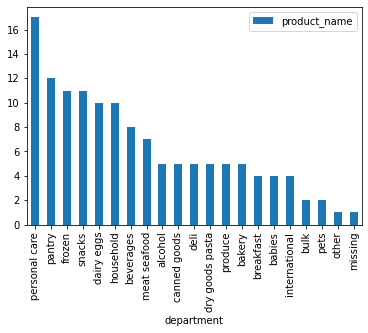

In [20]:
# Number of products in each department
prod_dep[["product_name","department"]].groupby(["department"]).count().sort_values(by="product_name",ascending=False).plot(kind="bar")

- The departments with more products available are personal care and pantry.

In [21]:
extra_merge.groupby("department_id").count()

order_id  product_id  add_to_cart_order  reordered  \
department_id                                                       
1                139536      139536             139536     139536   
2                  2240        2240               2240       2240   
3                 72983       72983              72983      72983   
4                588996      588996             588996     588996   
5                  9439        9439               9439       9439   
6                 16738       16738              16738      16738   
7                168126      168126             168126     168126   
8                  6013        6013               6013       6013   
9                 54054       54054              54054      54054   
10                 2133        2133               2133       2133   
11                28134       28134              28134      28134   
12                44271       44271              44271      44271   
13               116262      116262             116262     116262   
14                44605       44605              44605      44605   
15                66053       66053              66053      66053   
16               336915      336915             336915     336915   
17                46446       46446              46446      46446   
18                25940       25940              25940      25940   
19               180692      180692             180692     180692   
20                65176       65176              65176      65176   
21                 4749        4749               4749       4749   

               product_name  department  user_id  order_number  order_dow  \
department_id                                                               
1                    139536      139536   139536        139536     139536   
2                      2240        2240     2240          2240       2240   
3                     72983       72983    72983         72983      72983   
4                    588996      588996   588996        588996     588996   
5                      9439        9439     9439          9439       9439   
6                     16738       16738    16738         16738      16738   
7                    168126      168126   168126        168126     168126   
8                      6013        6013     6013          6013       6013   
9                     54054       54054    54054         54054      54054   
10                     2133        2133     2133          2133       2133   
11                    28134       28134    28134         28134      28134   
12                    44271       44271    44271         44271      44271   
13                   116262      116262   116262        116262     116262   
14                    44605       44605    44605         44605      44605   
15                    66053       66053    66053         66053      66053   
16                   336915      336915   336915        336915     336915   
17                    46446       46446    46446         46446      46446   
18                    25940       25940    25940         25940      25940   
19                   180692      180692   180692        180692     180692   
20                    65176       65176    65176         65176      65176   
21                     4749        4749     4749          4749       4749   

               order_hour_of_day  
department_id                     
1                         139536  
2                           2240  
3                          72983  
4                         588996  
5                           9439  
6                          16738  
7                         168126  
8                           6013  
9                          54054  
10                          2133  
11                         28134  
12                         44271  
13                        116262  
14                         44605  
15                         66053  
16                        336915  
17                       

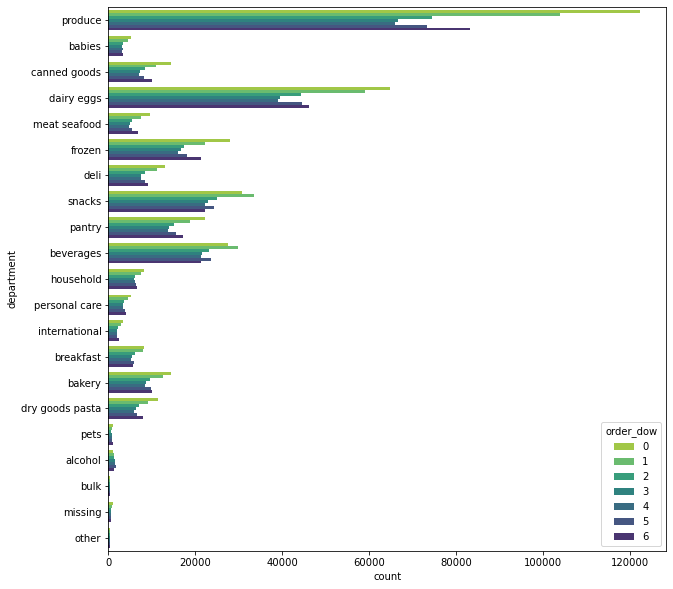

In [22]:
# Total number of items correspondent to each department sold in each day of the week
plt.figure(figsize=(10,10))
sns.countplot(y="department", data=extra_merge,  hue="order_dow", palette='viridis_r')

- The departments where the products are more bought is produce and dairy eggs and the shopping is done on weekends and monday

In [23]:
extra_merge['add_to_cart_order'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137], dtype=int64)

In [24]:
extra_merge_add1 = extra_merge.loc[extra_merge['add_to_cart_order'] == 1]

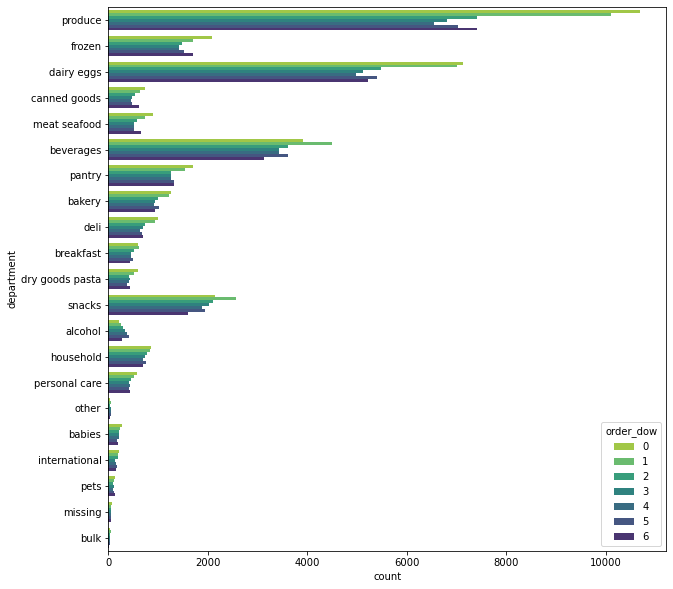

In [25]:
# Total number of items correspondent to each department sold in each day of the week added first to the cart
plt.figure(figsize=(10,10))
sns.countplot(y="department", data=extra_merge_add1,  hue="order_dow", palette='viridis_r')

- The products that were put first in the shopping cart belong to the produce and dairy eggs departments and also were more purchased on sunday and monday

In [26]:
# The most bought products
mostprod = pd.DataFrame(extra_merge.groupby(['product_name']).count()['order_id'].nlargest(10))
mostprod

order_id
product_name                           
fresh fruits                     226039
fresh vegetables                 212611
packaged vegetables fruits       109596
yogurt                            90751
packaged cheese                   61502
milk                              55150
water seltzer sparkling water     52564
chips pretzels                    45306
soy lactosefree                   39389
bread                             36381

Text(0.5, 1.0, 'Top 10 of the most bought products on all orders')

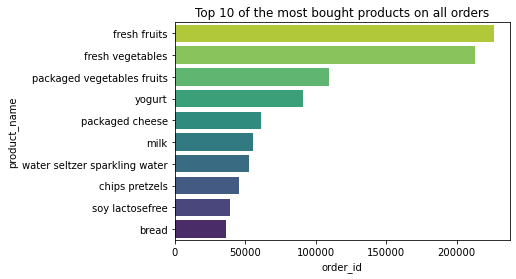

In [27]:
sns.barplot(x='order_id', y=mostprod.index, data=mostprod, palette='viridis_r')
plt.title("Top 10 of the most bought products on all orders")

- Top3 of most bought products are fresh fruits, fresh vegetables and packaged vegetables.

In [28]:
# The least bought products
leastprod = pd.DataFrame(extra_merge.groupby(['product_name']).count()['order_id'].nsmallest(10))
leastprod

order_id
product_name                        
frozen juice                     279
beauty                           387
baby accessories                 504
baby bath body care              515
kitchen supplies                 561
eye ear care                     598
specialty wines champagnes       614
shave needs                      646
skin care                        654
first aid                        693

Text(0.5, 1.0, 'Bottom 10 of the least bought products on all orders')

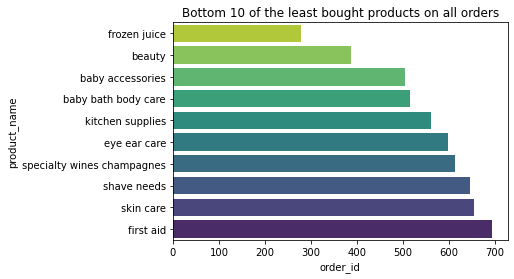

In [29]:
sns.barplot(x='order_id', y=leastprod.index, data=leastprod, palette='viridis_r')
plt.title("Bottom 10 of the least bought products on all orders")

- Bottom 3 of less bought products are fronzen juice, beauty and baby accessories.

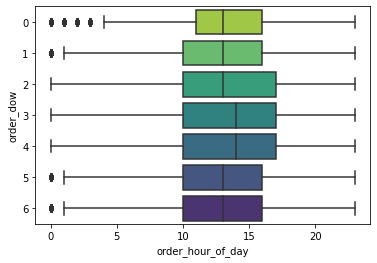

In [30]:
# Distribution of the orders regarding the hour of the day per day of the week 
sns.boxplot(x="order_hour_of_day", y="order_dow",data=extra_merge, orient='h', palette='viridis_r')

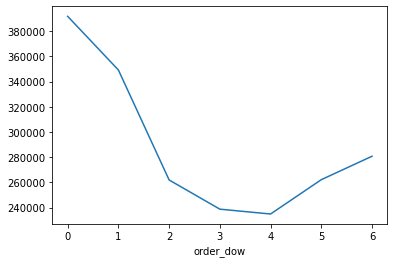

In [31]:
extra_merge.groupby("order_dow").count()["order_id"].plot()

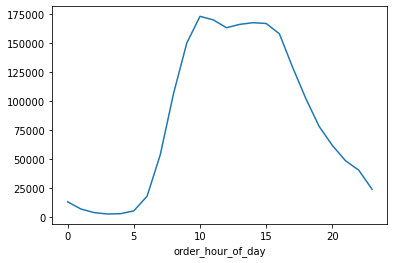

In [32]:
extra_merge.groupby("order_hour_of_day").count()["order_id"].plot()

-  Most shoppings occurred on sunday and monday between 10 AM and 3 PM

In [33]:
mostproddow= pd.DataFrame(extra_merge.groupby(['order_dow','product_name']).size().reset_index(name='0').sort_values(by=['order_dow', '0']))
mostproddow

order_dow                product_name      0
58           0                frozen juice     51
8            0                      beauty     72
76           0            kitchen supplies     74
121          0  specialty wines champagnes     75
2            0            baby accessories     81
..         ...                         ...    ...
897          6             packaged cheese   8734
937          6                      yogurt  11956
902          6  packaged vegetables fruits  15268
854          6                fresh fruits  30245
857          6            fresh vegetables  31831

[938 rows x 3 columns]

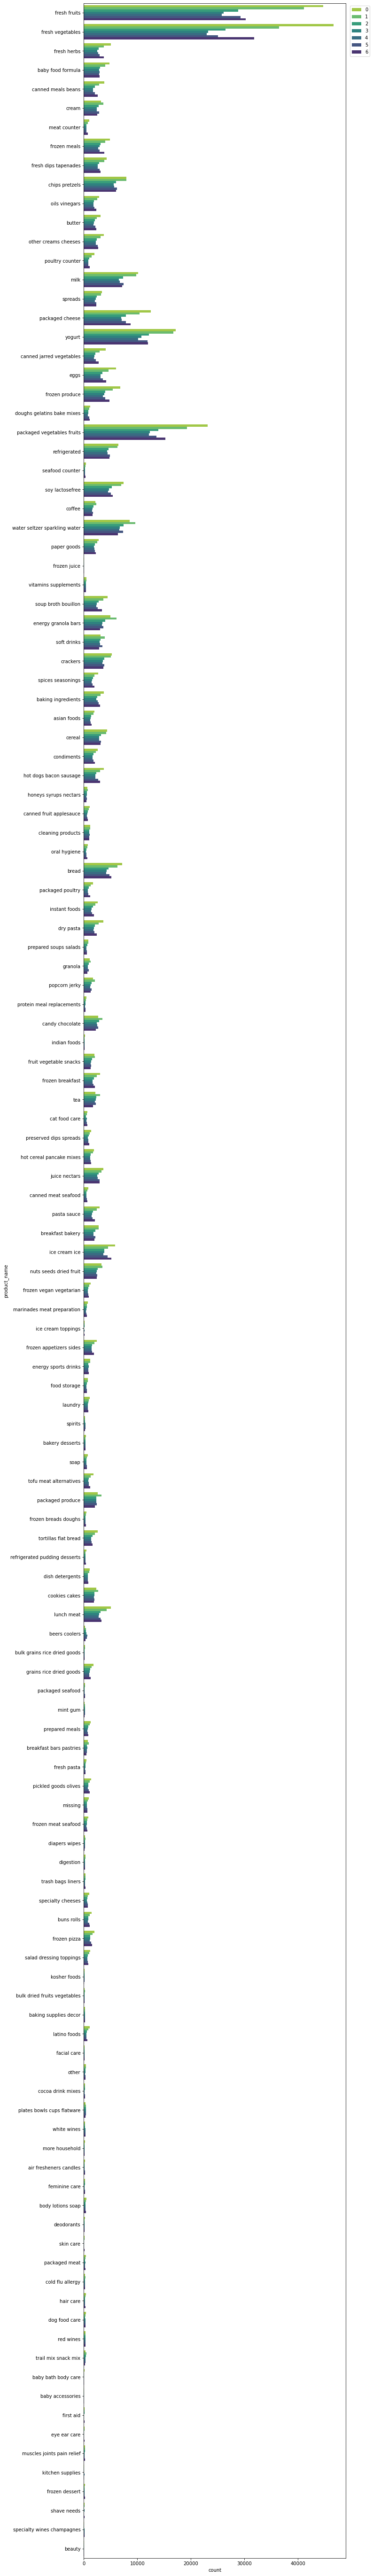

In [34]:
# Total number of each product sold in each day of the week 
plt.figure(figsize=(10,100))
sns.countplot(y="product_name", data=extra_merge,  hue="order_dow", palette='viridis_r')
plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.show()

-  Most bought products are fresh fruits and fresh vegetables on sunday and monday

In [35]:
df['reordered'].value_counts()

1    1190986
0     828515
Name: reordered, dtype: int64

In [36]:
df[["reordered","product_name","product_id"]].groupby(["product_name","reordered"]).count().sort_values(by="product_id",ascending=False)

product_id
product_name               reordered            
fresh fruits               1              162355
fresh vegetables           1              126171
                           0               86440
packaged vegetables fruits 1               69872
fresh fruits               0               63684
...                                          ...
baby bath body care        1                 143
eye ear care               1                 125
frozen juice               1                 121
kitchen supplies           1                 120
beauty                     1                  81

[268 rows x 1 columns]

In [37]:
test=df[["reordered","product_name","product_id"]].groupby(["product_name","reordered"]).count().unstack()
print(test)

                              product_id       
reordered                              0      1
product_name                                   
air fresheners candles               893    365
asian foods                         6865   3561
baby accessories                     244    260
baby bath body care                  372    143
baby food formula                   9508  13847
...                                  ...    ...
trash bags liners                   1323    697
vitamins supplements                1973    939
water seltzer sparkling water      14097  38467
white wines                          714   1179
yogurt                             28287  62464

[134 rows x 2 columns]


In [38]:
T=test.product_id.rename_axis([None], axis=1)
T

0      1
product_name                               
air fresheners candles           893    365
asian foods                     6865   3561
baby accessories                 244    260
baby bath body care              372    143
baby food formula               9508  13847
...                              ...    ...
trash bags liners               1323    697
vitamins supplements            1973    939
water seltzer sparkling water  14097  38467
white wines                      714   1179
yogurt                         28287  62464

[134 rows x 2 columns]

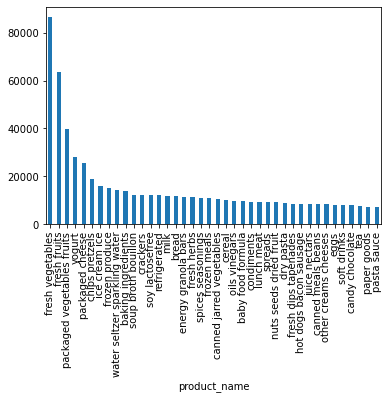

In [39]:
# Top 40 not reordered products
T[0].sort_values(ascending=False).head(40).plot(kind="bar")

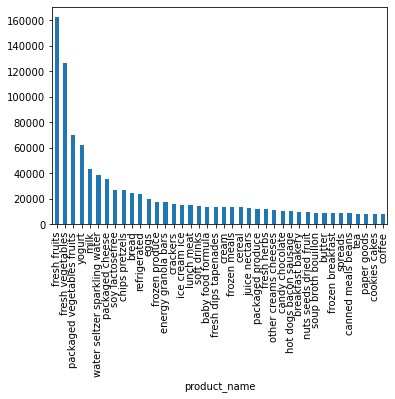

In [40]:
# Top 40 reordered products -- many correspond to the not reordered ones
T[1].sort_values(ascending=False).head(40).plot(kind="bar")

In [41]:
reordprod = extra_merge[['reordered','product_name', 'order_id']].groupby(['product_name', 'reordered']).count().unstack()
reordprod = reordprod.order_id.rename_axis([None], axis=1)
reordprod

0      1
product_name                               
air fresheners candles           893    365
asian foods                     6865   3561
baby accessories                 244    260
baby bath body care              372    143
baby food formula               9508  13847
...                              ...    ...
trash bags liners               1323    697
vitamins supplements            1973    939
water seltzer sparkling water  14097  38467
white wines                      714   1179
yogurt                         28287  62464

[134 rows x 2 columns]

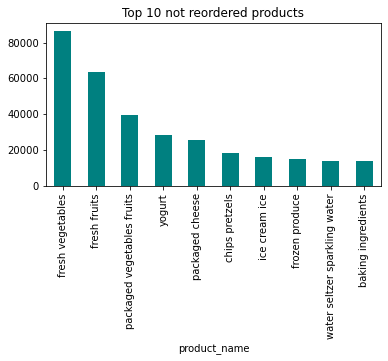

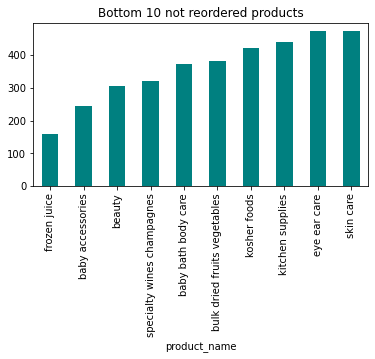

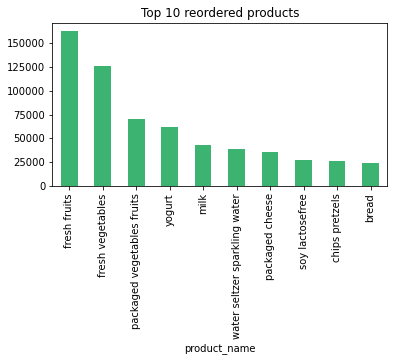

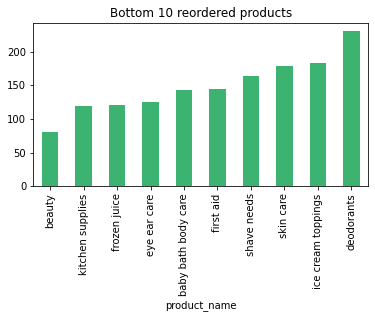

In [42]:
plt.figure(figsize=(6,3))
reordprod[0].sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title('Top 10 not reordered products')



plt.figure(figsize=(6,3))
reordprod[0].sort_values(ascending=True).head(10).plot(kind='bar', color='teal')
plt.title('Bottom 10 not reordered products')



plt.figure(figsize=(6,3))
reordprod[1].sort_values(ascending=False).head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 reordered products')



plt.figure(figsize=(6,3))
reordprod[1].sort_values(ascending=True).head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Bottom 10 reordered products')



plt.show()

In [43]:
# Number of orders concerning each product that was bought 
df[["order_id","product_name"]].groupby(["product_name"]).count().sort_values(by="order_id",ascending=False)

order_id
product_name                        
fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
...                              ...
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279

[134 rows x 1 columns]

In [44]:
mostproddow1= extra_merge[['order_dow','product_name', 'order_id']].groupby(['product_name', 'order_dow']).count().unstack()
mostproddow1

order_id                                     \
order_dow                            0      1      2      3      4      5   
product_name                                                                
air fresheners candles             205    170    170    156    151    184   
asian foods                       1983   1795   1365   1284   1194   1315   
baby accessories                    81     83     63     75     66     62   
baby bath body care                 94     89     64     61     65     82   
baby food formula                 4745   4009   3006   2816   2945   2857   
...                                ...    ...    ...    ...    ...    ...   
trash bags liners                  351    307    285    262    262    261   
vitamins supplements               503    484    405    382    367    381   
water seltzer sparkling water     8588   9610   7378   6701   6605   7327   
white wines                        254    248    258    270    281    315   
yogurt                           17192  16725  12144  10712  10160  11862   

                                      
order_dow                          6  
product_name                          
air fresheners candles           222  
asian foods                     1490  
baby accessories                  74  
baby bath body care               60  
baby food formula               2977  
...                              ...  
trash bags liners                292  
vitamins supplements             390  
water seltzer sparkling water   6355  
white wines                      267  
yogurt                         11956  

[134 rows x 7 columns]

In [45]:
proddow = mostproddow1.order_id.rename_axis([None], axis=1)
proddow

0      1      2      3      4      5      6
product_name                                                                  
air fresheners candles           205    170    170    156    151    184    222
asian foods                     1983   1795   1365   1284   1194   1315   1490
baby accessories                  81     83     63     75     66     62     74
baby bath body care               94     89     64     61     65     82     60
baby food formula               4745   4009   3006   2816   2945   2857   2977
...                              ...    ...    ...    ...    ...    ...    ...
trash bags liners                351    307    285    262    262    261    292
vitamins supplements             503    484    405    382    367    381    390
water seltzer sparkling water   8588   9610   7378   6701   6605   7327   6355
white wines                      254    248    258    270    281    315    267
yogurt                         17192  16725  12144  10712  10160  11862  11956

[134 rows x 7 columns]

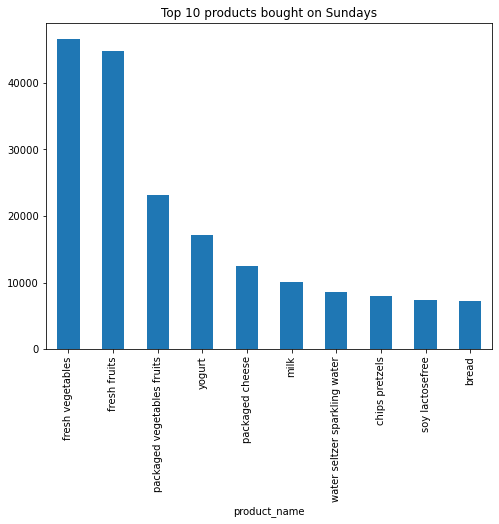

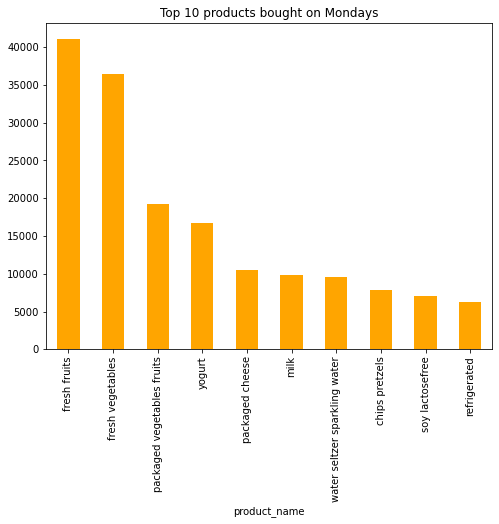

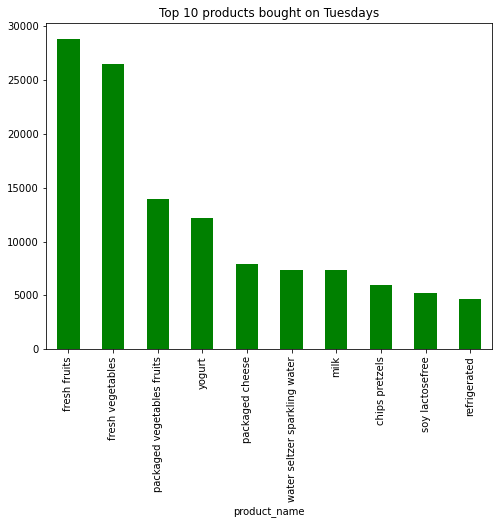

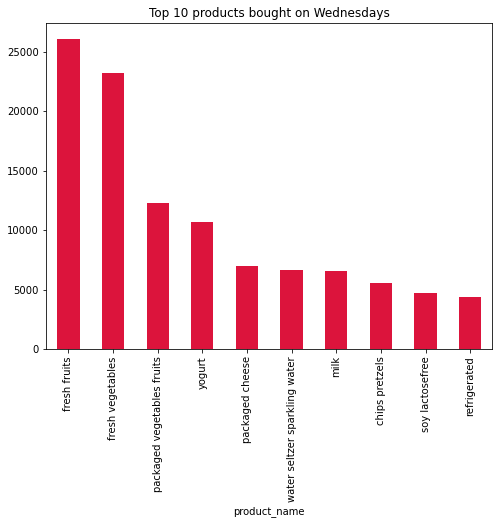

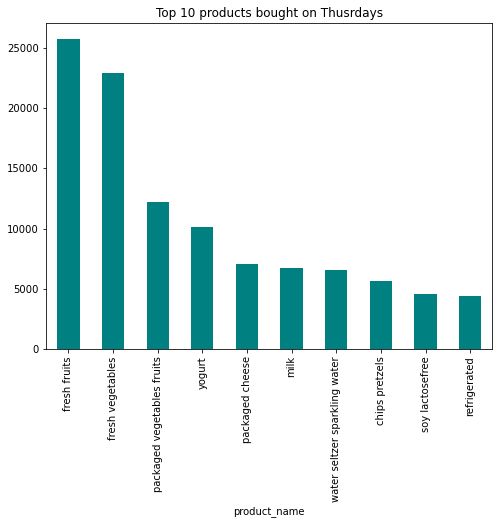

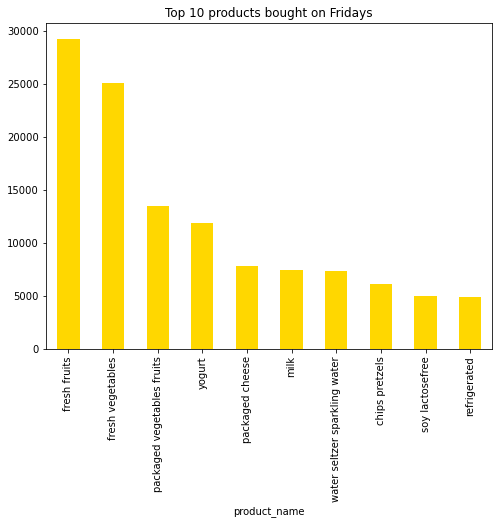

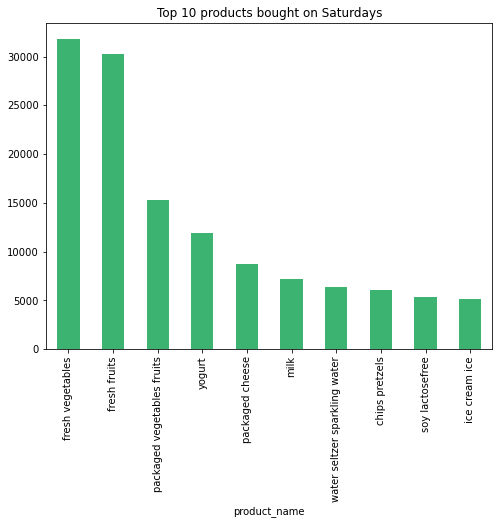

In [46]:
plt.figure(figsize=(8,6))
proddow[0].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 products bought on Sundays')



plt.figure(figsize=(8,6))
proddow[1].sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 products bought on Mondays')



plt.figure(figsize=(8,6))
proddow[2].sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top 10 products bought on Tuesdays')



plt.figure(figsize=(8,6))
proddow[3].sort_values(ascending=False).head(10).plot(kind='bar', color='crimson')
plt.title('Top 10 products bought on Wednesdays')



plt.figure(figsize=(8,6))
proddow[4].sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title('Top 10 products bought on Thusrdays')



plt.figure(figsize=(8,6))
proddow[5].sort_values(ascending=False).head(10).plot(kind='bar', color='gold')
plt.title('Top 10 products bought on Fridays')



plt.figure(figsize=(8,6))
proddow[6].sort_values(ascending=False).head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 products bought on Saturdays')

plt.show()

---------------------------

## Market Basket Analysis

In [47]:
mba=df.drop(columns={'product_id', 'add_to_cart_order', 'reordered',
       'department_id', 'department'})
mba.head()

order_id      product_name
0        10      fresh fruits
1        10  fresh vegetables
2        10       fresh herbs
3        10      fresh fruits
4        10  fresh vegetables

In [48]:
mba = pd.pivot_table(mba, index='order_id', columns='product_name', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
mba.head()

product_name  air fresheners candles  asian foods  baby accessories  \
order_id                                                              
10                               0.0          0.0               0.0   
11                               0.0          0.0               0.0   
28                               0.0          0.0               0.0   
38                               0.0          0.0               0.0   
56                               0.0          0.0               0.0   

product_name  baby bath body care  baby food formula  bakery desserts  \
order_id                                                                
10                            0.0                1.0              0.0   
11                            0.0                0.0              0.0   
28                            0.0                0.0              0.0   
38                            0.0                0.0              0.0   
56                            0.0                0.0              0.0   

product_name  baking ingredients  baking supplies decor  beauty  \
order_id                                                          
10                           0.0                    0.0     0.0   
11                           0.0                    0.0     0.0   
28                           0.0                    0.0     0.0   
38                           0.0                    0.0     0.0   
56                           0.0                    0.0     0.0   

product_name  beers coolers  ...  spreads  tea  tofu meat alternatives  \
order_id                     ...                                         
10                      0.0  ...      0.0  0.0                     0.0   
11                      0.0  ...      0.0  0.0                     0.0   
28                      0.0  ...      1.0  0.0                     0.0   
38                      0.0  ...      0.0  0.0                     0.0   
56                      0.0  ...      0.0  0.0                     0.0   

product_name  tortillas flat bread  trail mix snack mix  trash bags liners  \
order_id                                                                     
10                             0.0                  0.0                0.0   
11                             0.0                  0.0                0.0   
28                             0.0                  0.0                0.0   
38                             0.0                  0.0                0.0   
56                             0.0                  0.0                0.0   

product_name  vitamins supplements  water seltzer sparkling water  \
order_id                                                            
10                             0.0                            0.0   
11                             0.0                            0.0   
28                             0.0                            0.0   
38                             0.0                            0.0   
56                             0.0                            0.0   

product_name  white wines  yogurt  
order_id                           
10                    0.0     0.0  
11                    0.0     0.0  
28                    0.0     1.0  
38                    0.0     0.0  
56                    0.0     0.0  

[5 rows x 134 columns]

In [49]:
mba["fresh fruits"].sum()

111199.0

### Apriori - Frequent patterns

In [50]:
frequent_itemsets = apriori(mba, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False)

support                                           itemsets
18   0.555995                                     (fresh fruits)
20   0.444360                                 (fresh vegetables)
36   0.365415                       (packaged vegetables fruits)
75   0.317560                   (fresh fruits, fresh vegetables)
85   0.269870         (fresh fruits, packaged vegetables fruits)
..        ...                                                ...
21   0.051875                          (frozen appetizers sides)
132  0.051445     (refrigerated, fresh fruits, fresh vegetables)
151  0.051295         (milk, yogurt, packaged vegetables fruits)
126  0.050675  (eggs, fresh vegetables, packaged vegetables f...
56   0.050435             (canned meals beans, fresh vegetables)

[156 rows x 2 columns]

In [51]:
# return the items and itemsets with at least 20% support
freq20_itemsets = apriori(mba, min_support=0.20, use_colnames=True)
freq20_itemsets.sort_values(by="support", ascending=False)

support                                        itemsets
0  0.555995                                  (fresh fruits)
1  0.444360                              (fresh vegetables)
4  0.365415                    (packaged vegetables fruits)
6  0.317560                (fresh fruits, fresh vegetables)
7  0.269870      (fresh fruits, packaged vegetables fruits)
5  0.263675                                        (yogurt)
2  0.243325                                          (milk)
8  0.234555  (fresh vegetables, packaged vegetables fruits)
3  0.230995                               (packaged cheese)

In [52]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [53]:
fi=frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.1)]
fi.sort_values(by="support",ascending=False)

support                                           itemsets  length
75   0.317560                   (fresh fruits, fresh vegetables)       2
85   0.269870         (fresh fruits, packaged vegetables fruits)       2
100  0.234555     (fresh vegetables, packaged vegetables fruits)       2
91   0.188225                             (fresh fruits, yogurt)       2
131  0.186580  (packaged vegetables fruits, fresh fruits, fre...       3
81   0.164310                               (milk, fresh fruits)       2
84   0.155900                    (packaged cheese, fresh fruits)       2
105  0.144660                         (yogurt, fresh vegetables)       2
99   0.135850                (packaged cheese, fresh vegetables)       2
116  0.127910               (yogurt, packaged vegetables fruits)       2
97   0.124715                           (milk, fresh vegetables)       2
135  0.118420           (fresh fruits, yogurt, fresh vegetables)       3
88   0.117480                    (fresh fruits, soy lactosefree)       2
111  0.114610      (packaged cheese, packaged vegetables fruits)       2
49   0.112410                              (fresh fruits, bread)       2
90   0.111045      (fresh fruits, water seltzer sparkling water)       2
109  0.107425                 (milk, packaged vegetables fruits)       2
58   0.106300                     (chips pretzels, fresh fruits)       2
144  0.105790  (fresh fruits, yogurt, packaged vegetables fru...       3
130  0.104570  (packaged cheese, fresh fruits, fresh vegetables)       3

In [54]:
# Check product frequencies
df['product_name'].value_counts().head(6)

# Number of times each individual frequent item was purchased from all dataset

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
milk                           55150
Name: product_name, dtype: int64

In [55]:
df[["order_id","product_name"]].loc[(df['order_id'] == 10)]

order_id        product_name
0         10        fresh fruits
1         10    fresh vegetables
2         10         fresh herbs
3         10        fresh fruits
4         10    fresh vegetables
5         10         fresh herbs
6         10        fresh fruits
7         10   baby food formula
8         10   baby food formula
9         10  canned meals beans
10        10    fresh vegetables
11        10               cream
12        10        meat counter
13        10    fresh vegetables
14        10    fresh vegetables

In [56]:
freq=df[["order_id","product_name",'product_id']].loc[(df['product_name'] == 'fresh fruits')| (df['product_name'] == 'fresh vegetables')|
                                (df['product_name'] == 'packaged vegetables fruits')|(df['product_name'] == 'packaged cheese')|
                                (df['product_name'] == 'yogurt')|(df['product_name'] == 'milk')]
freq

order_id                product_name  product_id
0              10                fresh fruits          24
1              10            fresh vegetables          83
3              10                fresh fruits          24
4              10            fresh vegetables          83
6              10                fresh fruits          24
...           ...                         ...         ...
2019488   3420578                fresh fruits          24
2019489   3420578                fresh fruits          24
2019491   3420578             packaged cheese          21
2019492   3420578  packaged vegetables fruits         123
2019493   3420578            fresh vegetables          83

[755649 rows x 3 columns]

In [57]:
F=freq.groupby(["order_id",'product_name']).count().sort_values(by="product_id",ascending=False).unstack()
F

product_id                                        \
product_name fresh fruits fresh vegetables milk packaged cheese   
order_id                                                          
10                    3.0              5.0  NaN             NaN   
28                    4.0              2.0  3.0             1.0   
38                    NaN              1.0  NaN             NaN   
56                    1.0              1.0  NaN             1.0   
62                    2.0              1.0  NaN             NaN   
...                   ...              ...  ...             ...   
3420977               1.0              NaN  NaN             NaN   
3420991               3.0              NaN  NaN             NaN   
3421027               3.0              1.0  NaN             NaN   
3421074               NaN              1.0  NaN             1.0   
3421080               NaN              1.0  1.0             NaN   

                                                
product_name packaged vegetables fruits yogurt  
order_id                                        
10                                  NaN    NaN  
28                                  NaN    1.0  
38                                  2.0    NaN  
56                                  1.0    NaN  
62                                  1.0    NaN  
...                                 ...    ...  
3420977                             NaN    NaN  
3420991                             2.0    NaN  
3421027                             1.0    1.0  
3421074                             NaN    NaN  
3421080                             NaN    NaN  

[164883 rows x 6 columns]

In [58]:
F.mean()
# Average quantity each frequent item is bought per purchase -- based on the database's orders

            product_name              
product_id  fresh fruits                  2.032743
            fresh vegetables              2.392328
            milk                          1.133258
            packaged cheese               1.331241
            packaged vegetables fruits    1.499610
            yogurt                        1.720887
dtype: float64

In [59]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [60]:
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.1)]

support                                           itemsets  length
49   0.112410                              (fresh fruits, bread)       2
58   0.106300                     (chips pretzels, fresh fruits)       2
75   0.317560                   (fresh fruits, fresh vegetables)       2
81   0.164310                               (milk, fresh fruits)       2
84   0.155900                    (packaged cheese, fresh fruits)       2
85   0.269870         (fresh fruits, packaged vegetables fruits)       2
88   0.117480                    (fresh fruits, soy lactosefree)       2
90   0.111045      (fresh fruits, water seltzer sparkling water)       2
91   0.188225                             (fresh fruits, yogurt)       2
97   0.124715                           (milk, fresh vegetables)       2
99   0.135850                (packaged cheese, fresh vegetables)       2
100  0.234555     (fresh vegetables, packaged vegetables fruits)       2
105  0.144660                         (yogurt, fresh vegetables)       2
109  0.107425                 (milk, packaged vegetables fruits)       2
111  0.114610      (packaged cheese, packaged vegetables fruits)       2
116  0.127910               (yogurt, packaged vegetables fruits)       2
130  0.104570  (packaged cheese, fresh fruits, fresh vegetables)       3
131  0.186580  (packaged vegetables fruits, fresh fruits, fre...       3
135  0.118420           (fresh fruits, yogurt, fresh vegetables)       3
144  0.105790  (fresh fruits, yogurt, packaged vegetables fru...       3

In [61]:
print("Items that appear in more rules:")
print("Nr of fresh fruit" +" " +str(len(frequent_itemsets[['fresh fruits' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of fresh vegetables" + " "+str(len(frequent_itemsets[['fresh vegetables' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of packaged vegetables fruits" + " "+str(len(frequent_itemsets[['packaged vegetables fruits' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of yogurt" +" " +str(len(frequent_itemsets[['yogurt' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of packaged cheese" +" " +str(len(frequent_itemsets[['packaged cheese' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of milk" +" " +str(len(frequent_itemsets[['milk' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of bread" +" " +str(len(frequent_itemsets[['bread' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of chips pretzels" +" " +str(len(frequent_itemsets[['chips pretzels' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of soy lactosefree" +" " +str(len(frequent_itemsets[['soy lactosefree' in elem for elem in frequent_itemsets['itemsets']]])))
print("Nr of water seltzer sparkling water" +" " +str(len(frequent_itemsets[['water seltzer sparkling water' in elem for elem in frequent_itemsets['itemsets']]])))

Items that appear in more rules:
Nr of fresh fruit 54
Nr of fresh vegetables 45
Nr of packaged vegetables fruits 38
Nr of yogurt 20
Nr of packaged cheese 16
Nr of milk 15
Nr of bread 10
Nr of chips pretzels 8
Nr of soy lactosefree 8
Nr of water seltzer sparkling water 7


In [62]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'fresh fruits', 'fresh vegetables'}]

support                          itemsets  length
75  0.31756  (fresh fruits, fresh vegetables)       2

In [63]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'fresh fruits'}]

support        itemsets  length
18  0.555995  (fresh fruits)       1

In [64]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'fresh vegetables'}]

support            itemsets  length
20  0.44436  (fresh vegetables)       1

### Association Rules

In [65]:
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence

antecedents  \
188                        (fresh herbs, fresh fruits)   
374  (yogurt, fresh vegetables, packaged vegetables...   
345  (milk, fresh vegetables, packaged vegetables f...   
86                                       (fresh herbs)   
359  (packaged cheese, fresh vegetables, packaged v...   
..                                                 ...   
57                                      (fresh fruits)   
246                                     (fresh fruits)   
77                                      (fresh fruits)   
80                                      (fresh fruits)   
222                                     (fresh fruits)   

                                      consequents  antecedent support  \
188                            (fresh vegetables)            0.070135   
374                                (fresh fruits)            0.087995   
345                                (fresh fruits)            0.073075   
86                             (fresh vegetables)            0.093005   
359                                (fresh fruits)            0.081970   
..                                            ...                 ...   
57                       (hot dogs bacon sausage)            0.555995   
246  (frozen produce, packaged vegetables fruits)            0.555995   
77                          (soup broth bouillon)            0.555995   
80                                      (spreads)            0.555995   
222              (refrigerated, fresh vegetables)            0.555995   

     consequent support   support  confidence      lift  leverage  conviction  
188            0.444360  0.061815    0.881372  1.983463  0.030650    4.683872  
374            0.555995  0.076240    0.866413  1.558311  0.027315    3.323711  
345            0.555995  0.062535    0.855765  1.539159  0.021906    3.078336  
86             0.444360  0.078655    0.845707  1.903203  0.037327    3.601205  
359            0.555995  0.068325    0.833537  1.499180  0.022750    2.667284  
..                  ...       ...         ...       ...       ...         ...  
57             0.084190  0.054425    0.097888  1.162698  0.007616    1.015184  
246            0.066985  0.054415    0.097870  1.461067  0.017172    1.034235  
77             0.083365  0.053880    0.096907  1.162446  0.007529    1.014996  
80             0.078185  0.053560    0.096332  1.232101  0.010090    1.020081  
222            0.065825  0.051445    0.092528  1.405664  0.014847    1.029425  

[386 rows x 9 columns]

In [66]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift

antecedents  \
189                               (fresh herbs)   
188            (fresh fruits, fresh vegetables)   
191                          (fresh vegetables)   
186                 (fresh herbs, fresh fruits)   
374  (fresh fruits, packaged vegetables fruits)   
..                                          ...   
130             (water seltzer sparkling water)   
82                               (fresh fruits)   
83              (water seltzer sparkling water)   
232             (water seltzer sparkling water)   
229            (fresh fruits, fresh vegetables)   

                          consequents  antecedent support  consequent support  \
189  (fresh fruits, fresh vegetables)            0.093005            0.317560   
188                     (fresh herbs)            0.317560            0.093005   
191       (fresh herbs, fresh fruits)            0.444360            0.070135   
186                (fresh vegetables)            0.070135            0.444360   
374        (yogurt, fresh vegetables)            0.269870            0.144660   
..                                ...                 ...                 ...   
130      (packaged vegetables fruits)            0.193005            0.365415   
82    (water seltzer sparkling water)            0.555995            0.193005   
83                     (fresh fruits)            0.193005            0.555995   
232  (fresh fruits, fresh vegetables)            0.193005            0.317560   
229   (water seltzer sparkling water)            0.317560            0.193005   

      support  confidence      lift  leverage  conviction  
189  0.061815    0.664642  2.092964  0.032280    2.034958  
188  0.061815    0.194656  2.092964  0.032280    1.126221  
191  0.061815    0.139110  1.983463  0.030650    1.080121  
186  0.061815    0.881372  1.983463  0.030650    4.683872  
374  0.076240    0.282506  1.952899  0.037201    1.192122  
..        ...         ...       ...       ...         ...  
130  0.073715    0.381933  1.045204  0.003188    1.026725  
82   0.111045    0.199723  1.034807  0.003735    1.008395  
83   0.111045    0.575348  1.034807  0.003735    1.045573  
232  0.063235    0.327634  1.031723  0.001944    1.014983  
229  0.063235    0.199128  1.031723  0.001944    1.007645  

[384 rows x 9 columns]

In [67]:
# Generate the association rules - by conviction
rulesConviction = association_rules(frequent_itemsets, metric="conviction", min_threshold=1)
rulesConviction.sort_values(by='conviction', ascending=False, inplace=True)
rulesConviction

antecedents  \
186                        (fresh herbs, fresh fruits)   
86                                       (fresh herbs)   
372  (yogurt, fresh vegetables, packaged vegetables...   
343  (milk, fresh vegetables, packaged vegetables f...   
357  (packaged cheese, fresh vegetables, packaged v...   
..                                                 ...   
131                       (packaged vegetables fruits)   
82                                      (fresh fruits)   
229                   (fresh fruits, fresh vegetables)   
93                                  (fresh vegetables)   
58                                      (fresh fruits)   

                         consequents  antecedent support  consequent support  \
186               (fresh vegetables)            0.070135            0.444360   
86                (fresh vegetables)            0.093005            0.444360   
372                   (fresh fruits)            0.087995            0.555995   
343                   (fresh fruits)            0.073075            0.555995   
357                   (fresh fruits)            0.081970            0.555995   
..                               ...                 ...                 ...   
131  (water seltzer sparkling water)            0.365415            0.193005   
82   (water seltzer sparkling water)            0.555995            0.193005   
229  (water seltzer sparkling water)            0.317560            0.193005   
93                   (ice cream ice)            0.444360            0.110510   
58                   (ice cream ice)            0.555995            0.110510   

      support  confidence      lift  leverage  conviction  
186  0.061815    0.881372  1.983463  0.030650    4.683872  
86   0.078655    0.845707  1.903203  0.037327    3.601205  
372  0.076240    0.866413  1.558311  0.027315    3.323711  
343  0.062535    0.855765  1.539159  0.021906    3.078336  
357  0.068325    0.833537  1.499180  0.022750    2.667284  
..        ...         ...       ...       ...         ...  
131  0.073715    0.201730  1.045204  0.003188    1.010929  
82   0.111045    0.199723  1.034807  0.003735    1.008395  
229  0.063235    0.199128  1.031723  0.001944    1.007645  
93   0.051995    0.117011  1.058827  0.002889    1.007362  
58   0.064485    0.115981  1.049509  0.003042    1.006189  

[384 rows x 9 columns]

In [68]:
rulesConfidence[rulesConfidence['lift'] >= 1.5]

antecedents  \
188                        (fresh herbs, fresh fruits)   
374  (yogurt, fresh vegetables, packaged vegetables...   
345  (milk, fresh vegetables, packaged vegetables f...   
86                                       (fresh herbs)   
12                          (canned jarred vegetables)   
..                                                 ...   
13                                  (fresh vegetables)   
156                                 (fresh vegetables)   
186                                 (fresh vegetables)   
15                                  (fresh vegetables)   
356                                     (fresh fruits)   

                                           consequents  antecedent support  \
188                                 (fresh vegetables)            0.070135   
374                                     (fresh fruits)            0.087995   
345                                     (fresh fruits)            0.073075   
86                                  (fresh vegetables)            0.093005   
12                                  (fresh vegetables)            0.071890   
..                                                 ...                 ...   
13                          (canned jarred vegetables)            0.444360   
156                (bread, packaged vegetables fruits)            0.444360   
186                 (eggs, packaged vegetables fruits)            0.444360   
15                                (canned meals beans)            0.444360   
356  (milk, fresh vegetables, packaged vegetables f...            0.555995   

     consequent support   support  confidence      lift  leverage  conviction  
188            0.444360  0.061815    0.881372  1.983463  0.030650    4.683872  
374            0.555995  0.076240    0.866413  1.558311  0.027315    3.323711  
345            0.555995  0.062535    0.855765  1.539159  0.021906    3.078336  
86             0.444360  0.078655    0.845707  1.903203  0.037327    3.601205  
12             0.444360  0.055055    0.765823  1.723429  0.023110    2.372733  
..                  ...       ...         ...       ...       ...         ...  
13             0.071890  0.055055    0.123897  1.723429  0.023110    1.059362  
156            0.077055  0.053835    0.121152  1.572277  0.019595    1.050176  
186            0.068650  0.050675    0.114040  1.661186  0.020170    1.051233  
15             0.069705  0.050435    0.113500  1.628295  0.019461    1.049403  
356            0.073075  0.062535    0.112474  1.539159  0.021906    1.044392  

[138 rows x 9 columns]

In [69]:
baseline=rulesConfidence[(rulesConfidence['confidence'] >= 0.5) & (rulesConfidence['lift'] > 1)]
baseline.sort_values(by=['confidence','lift'], ascending=False, inplace=True)
baseline

<ipython-input-69-c0a15baf6bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline.sort_values(by=['confidence','lift'], ascending=False, inplace=True)


antecedents  \
188                        (fresh herbs, fresh fruits)   
374  (yogurt, fresh vegetables, packaged vegetables...   
345  (milk, fresh vegetables, packaged vegetables f...   
86                                       (fresh herbs)   
359  (packaged cheese, fresh vegetables, packaged v...   
..                                                 ...   
284      (fresh fruits, water seltzer sparkling water)   
197                                   (frozen produce)   
40                                              (eggs)   
366                (packaged cheese, fresh vegetables)   
350                           (milk, fresh vegetables)   

                                    consequents  antecedent support  \
188                          (fresh vegetables)            0.070135   
374                              (fresh fruits)            0.087995   
345                              (fresh fruits)            0.073075   
86                           (fresh vegetables)            0.093005   
359                              (fresh fruits)            0.081970   
..                                          ...                 ...   
284                (packaged vegetables fruits)            0.111045   
197            (fresh fruits, fresh vegetables)            0.122580   
40                 (packaged vegetables fruits)            0.136490   
366  (fresh fruits, packaged vegetables fruits)            0.135850   
350  (fresh fruits, packaged vegetables fruits)            0.124715   

     consequent support   support  confidence      lift  leverage  conviction  
188            0.444360  0.061815    0.881372  1.983463  0.030650    4.683872  
374            0.555995  0.076240    0.866413  1.558311  0.027315    3.323711  
345            0.555995  0.062535    0.855765  1.539159  0.021906    3.078336  
86             0.444360  0.078655    0.845707  1.903203  0.037327    3.601205  
359            0.555995  0.068325    0.833537  1.499180  0.022750    2.667284  
..                  ...       ...         ...       ...       ...         ...  
284            0.365415  0.056550    0.509253  1.393629  0.015972    1.293100  
197            0.317560  0.062170    0.507179  1.597112  0.023243    1.384762  
40             0.365415  0.068650    0.502967  1.376427  0.018775    1.276747  
366            0.269870  0.068325    0.502944  1.863654  0.031663    1.468910  
350            0.269870  0.062535    0.501423  1.858018  0.028878    1.464428  

[128 rows x 9 columns]

In [70]:
rulesConfidence_2=rulesConfidence[rulesConfidence['confidence'] >= 0.5]
rulesConfidence_2.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence_2

<ipython-input-70-5aa367092ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rulesConfidence_2.sort_values(by='confidence', ascending=False, inplace=True)


antecedents  \
188                        (fresh herbs, fresh fruits)   
374  (yogurt, fresh vegetables, packaged vegetables...   
345  (milk, fresh vegetables, packaged vegetables f...   
86                                       (fresh herbs)   
359  (packaged cheese, fresh vegetables, packaged v...   
..                                                 ...   
284      (fresh fruits, water seltzer sparkling water)   
197                                   (frozen produce)   
40                                              (eggs)   
366                (packaged cheese, fresh vegetables)   
350                           (milk, fresh vegetables)   

                                    consequents  antecedent support  \
188                          (fresh vegetables)            0.070135   
374                              (fresh fruits)            0.087995   
345                              (fresh fruits)            0.073075   
86                           (fresh vegetables)            0.093005   
359                              (fresh fruits)            0.081970   
..                                          ...                 ...   
284                (packaged vegetables fruits)            0.111045   
197            (fresh fruits, fresh vegetables)            0.122580   
40                 (packaged vegetables fruits)            0.136490   
366  (fresh fruits, packaged vegetables fruits)            0.135850   
350  (fresh fruits, packaged vegetables fruits)            0.124715   

     consequent support   support  confidence      lift  leverage  conviction  
188            0.444360  0.061815    0.881372  1.983463  0.030650    4.683872  
374            0.555995  0.076240    0.866413  1.558311  0.027315    3.323711  
345            0.555995  0.062535    0.855765  1.539159  0.021906    3.078336  
86             0.444360  0.078655    0.845707  1.903203  0.037327    3.601205  
359            0.555995  0.068325    0.833537  1.499180  0.022750    2.667284  
..                  ...       ...         ...       ...       ...         ...  
284            0.365415  0.056550    0.509253  1.393629  0.015972    1.293100  
197            0.317560  0.062170    0.507179  1.597112  0.023243    1.384762  
40             0.365415  0.068650    0.502967  1.376427  0.018775    1.276747  
366            0.269870  0.068325    0.502944  1.863654  0.031663    1.468910  
350            0.269870  0.062535    0.501423  1.858018  0.028878    1.464428  

[128 rows x 9 columns]

In [71]:
# High Confidence and high Lift - complementary products
rulesConfidence_cp=rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.7)]
rulesConfidence_cp.sort_values(by=['confidence','lift'], ascending=False, inplace=True)
rulesConfidence_cp

<ipython-input-71-4279f42d669e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rulesConfidence_cp.sort_values(by=['confidence','lift'], ascending=False, inplace=True)


antecedents         consequents  antecedent support  \
188  (fresh herbs, fresh fruits)  (fresh vegetables)            0.070135   
86                 (fresh herbs)  (fresh vegetables)            0.093005   
12    (canned jarred vegetables)  (fresh vegetables)            0.071890   

     consequent support   support  confidence      lift  leverage  conviction  
188             0.44436  0.061815    0.881372  1.983463  0.030650    4.683872  
86              0.44436  0.078655    0.845707  1.903203  0.037327    3.601205  
12              0.44436  0.055055    0.765823  1.723429  0.023110    2.372733

- When they buy fresh fruits, fresh herbs, in 88% of the time they also buy fresh vegetables
- When they buy fresh herbs, in 84% of the time they also buy fresh vegetables
- When they buy canned jarred vegetables, in 76% of the time they also buy fresh vegetables  <br>
**Complementary products - fresh fruits, fresh herbs and fresh vegetables**

In [72]:
# High Confidence rules where "item" is in the RHS
print("packaged vegetables fruits" + " "+str(len(rulesConfidence[['packaged vegetables fruits' in elem for elem in rulesConfidence['consequents']]])))
print("fresh fruits" + " "+str(len(rulesConfidence[['fresh fruits' in elem for elem in rulesConfidence['consequents']]])))
print("fresh herbs" + " "+str(len(rulesConfidence[['fresh herbs' in elem for elem in rulesConfidence['consequents']]])))
print("fresh vegetables" + " "+str(len(rulesConfidence[['fresh vegetables' in elem for elem in rulesConfidence['consequents']]])))

packaged vegetables fruits 91
fresh fruits 119
fresh herbs 6
fresh vegetables 102


In [73]:
# Substitue products 
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2[(rulesLift2['lift'] < 1.0)]

antecedents                      consequents  \
110  (water seltzer sparkling water)               (fresh vegetables)   
111               (fresh vegetables)  (water seltzer sparkling water)   

     antecedent support  consequent support   support  confidence      lift  \
110            0.193005            0.444360  0.083355    0.431880  0.971915   
111            0.444360            0.193005  0.083355    0.187584  0.971915   

     leverage  conviction  
110 -0.002409    0.978033  
111 -0.002409    0.993328

- When they buy water seltzer sparkling water, in 43% of the time they also buy fresh vegetables
- When they buy fresh vegetables, in 19% of the time they also buy water seltzer sparkling water <br>
**Substitute products: water seltzer sparkling water with fresh vegetables**

In [99]:
# Conviction - high conviction value means that the consequent is highly dependent on the antecedent
rulesLift2[rulesLift2['conviction'] < 1.01]

antecedents                      consequents  \
110   (water seltzer sparkling water)               (fresh vegetables)   
111                (fresh vegetables)  (water seltzer sparkling water)   
231  (fresh fruits, fresh vegetables)  (water seltzer sparkling water)   
82                     (fresh fruits)  (water seltzer sparkling water)   
58                     (fresh fruits)                  (ice cream ice)   
93                 (fresh vegetables)                  (ice cream ice)   

     antecedent support  consequent support   support  confidence      lift  \
110            0.193005            0.444360  0.083355    0.431880  0.971915   
111            0.444360            0.193005  0.083355    0.187584  0.971915   
231            0.317560            0.193005  0.063235    0.199128  1.031723   
82             0.555995            0.193005  0.111045    0.199723  1.034807   
58             0.555995            0.110510  0.064485    0.115981  1.049509   
93             0.444360            0.110510  0.051995    0.117011  1.058827   

     leverage  conviction  
110 -0.002409    0.978033  
111 -0.002409    0.993328  
231  0.001944    1.007645  
82   0.003735    1.008395  
58   0.003042    1.006189  
93   0.002889    1.007362

**More independent set of products: water seltzer sparkling water and fresh vegetables**

In [75]:
# Conviction - high conviction value means that the consequent is highly dependent on the antecedent
rulesConfidence.sort_values(by="conviction", ascending=False)

antecedents  \
188                        (fresh herbs, fresh fruits)   
86                                       (fresh herbs)   
374  (yogurt, fresh vegetables, packaged vegetables...   
345  (milk, fresh vegetables, packaged vegetables f...   
359  (packaged cheese, fresh vegetables, packaged v...   
..                                                 ...   
231                   (fresh fruits, fresh vegetables)   
93                                  (fresh vegetables)   
58                                      (fresh fruits)   
111                                 (fresh vegetables)   
110                    (water seltzer sparkling water)   

                         consequents  antecedent support  consequent support  \
188               (fresh vegetables)            0.070135            0.444360   
86                (fresh vegetables)            0.093005            0.444360   
374                   (fresh fruits)            0.087995            0.555995   
345                   (fresh fruits)            0.073075            0.555995   
359                   (fresh fruits)            0.081970            0.555995   
..                               ...                 ...                 ...   
231  (water seltzer sparkling water)            0.317560            0.193005   
93                   (ice cream ice)            0.444360            0.110510   
58                   (ice cream ice)            0.555995            0.110510   
111  (water seltzer sparkling water)            0.444360            0.193005   
110               (fresh vegetables)            0.193005            0.444360   

      support  confidence      lift  leverage  conviction  
188  0.061815    0.881372  1.983463  0.030650    4.683872  
86   0.078655    0.845707  1.903203  0.037327    3.601205  
374  0.076240    0.866413  1.558311  0.027315    3.323711  
345  0.062535    0.855765  1.539159  0.021906    3.078336  
359  0.068325    0.833537  1.499180  0.022750    2.667284  
..        ...         ...       ...       ...         ...  
231  0.063235    0.199128  1.031723  0.001944    1.007645  
93   0.051995    0.117011  1.058827  0.002889    1.007362  
58   0.064485    0.115981  1.049509  0.003042    1.006189  
111  0.083355    0.187584  0.971915 -0.002409    0.993328  
110  0.083355    0.431880  0.971915 -0.002409    0.978033  

[386 rows x 9 columns]

In [100]:
# More filtered  ---- 12 rows
higher_baseline = rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]
higher_baseline

antecedents         consequents  \
188                        (fresh herbs, fresh fruits)  (fresh vegetables)   
374  (yogurt, fresh vegetables, packaged vegetables...      (fresh fruits)   
345  (milk, fresh vegetables, packaged vegetables f...      (fresh fruits)   
86                                       (fresh herbs)  (fresh vegetables)   
12                          (canned jarred vegetables)  (fresh vegetables)   
358  (packaged cheese, fresh fruits, packaged veget...  (fresh vegetables)   
183                 (eggs, packaged vegetables fruits)  (fresh vegetables)   
14                                (canned meals beans)  (fresh vegetables)   
372  (fresh fruits, yogurt, packaged vegetables fru...  (fresh vegetables)   
309      (packaged cheese, packaged vegetables fruits)  (fresh vegetables)   
344   (milk, fresh fruits, packaged vegetables fruits)  (fresh vegetables)   
321      (soy lactosefree, packaged vegetables fruits)  (fresh vegetables)   

     antecedent support  consequent support   support  confidence      lift  \
188            0.070135            0.444360  0.061815    0.881372  1.983463   
374            0.087995            0.555995  0.076240    0.866413  1.558311   
345            0.073075            0.555995  0.062535    0.855765  1.539159   
86             0.093005            0.444360  0.078655    0.845707  1.903203   
12             0.071890            0.444360  0.055055    0.765823  1.723429   
358            0.090715            0.444360  0.068325    0.753183  1.694984   
183            0.068650            0.444360  0.050675    0.738165  1.661186   
14             0.069705            0.444360  0.050435    0.723549  1.628295   
372            0.105790            0.444360  0.076240    0.720673  1.621822   
309            0.114610            0.444360  0.081970    0.715208  1.609524   
344            0.087450            0.444360  0.062535    0.715094  1.609268   
321            0.081385            0.444360  0.057695    0.708914  1.595361   

     leverage  conviction  
188  0.030650    4.683872  
374  0.027315    3.323711  
345  0.021906    3.078336  
86   0.037327    3.601205  
12   0.023110    2.372733  
358  0.028015    2.251223  
183  0.020170    2.122097  
14   0.019461    2.009906  
372  0.029231    1.989210  
309  0.031042    1.951039  
344  0.023676    1.950260  
321  0.021531    1.908854

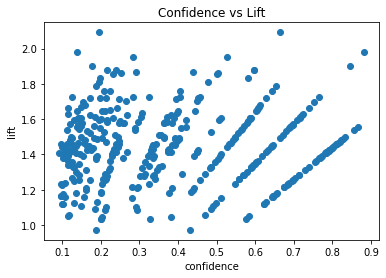

In [77]:
# Confidence vs Lift of the rules
plt.scatter(rulesConfidence['confidence'], rulesConfidence['lift'])
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

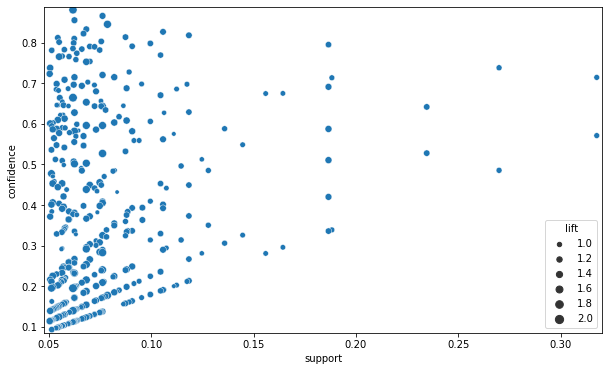

In [78]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))

sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rulesConfidence)
plt.margins(0.01,0.01)
plt.show()

<ipython-input-79-fcd920f5abd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
<ipython-input-79-fcd920f5abd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
<ipython-input-79-fcd920f5abd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

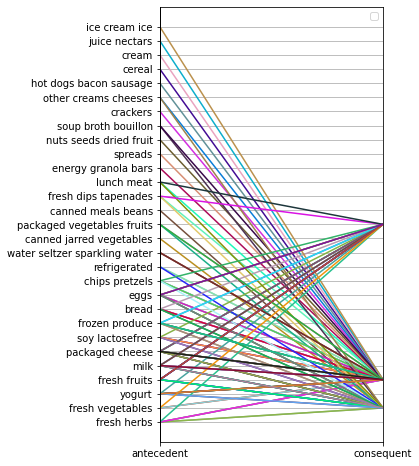

In [79]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

from pandas.plotting import parallel_coordinates

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(baseline)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

If we consider only the rules with confidence >= 0.5 and lift > 1, 
we obtain as consequent **fresh fruits, fresh herbs and fresh vegetables** <br>
Most likely in every shopping the customer will buy one of the three above mentionated. <br>
Source:https://www.srose.biz/research-analysis/market-basket-analysis-in-python/

<ipython-input-79-fcd920f5abd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
<ipython-input-79-fcd920f5abd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
<ipython-input-79-fcd920f5abd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

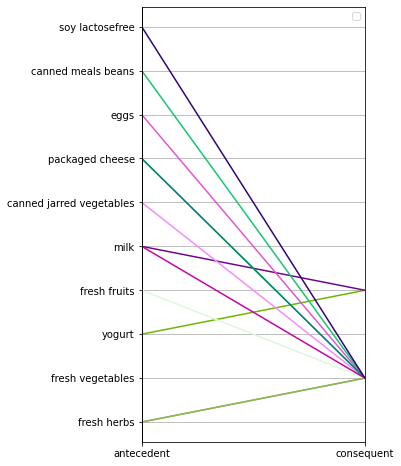

In [80]:
coords1 = rules_to_coordinates(higher_baseline)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords1, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

<ipython-input-81-2a71f2c0d4ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline['antecedents_'] = baseline['antecedents'].apply(lambda a: ','.join(list(a)))
<ipython-input-81-2a71f2c0d4ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline['consequents_'] = baseline['consequents'].apply(lambda a: ','.join(list(a)))# Transform the DataFrame of rules into a matrix using the lift metric


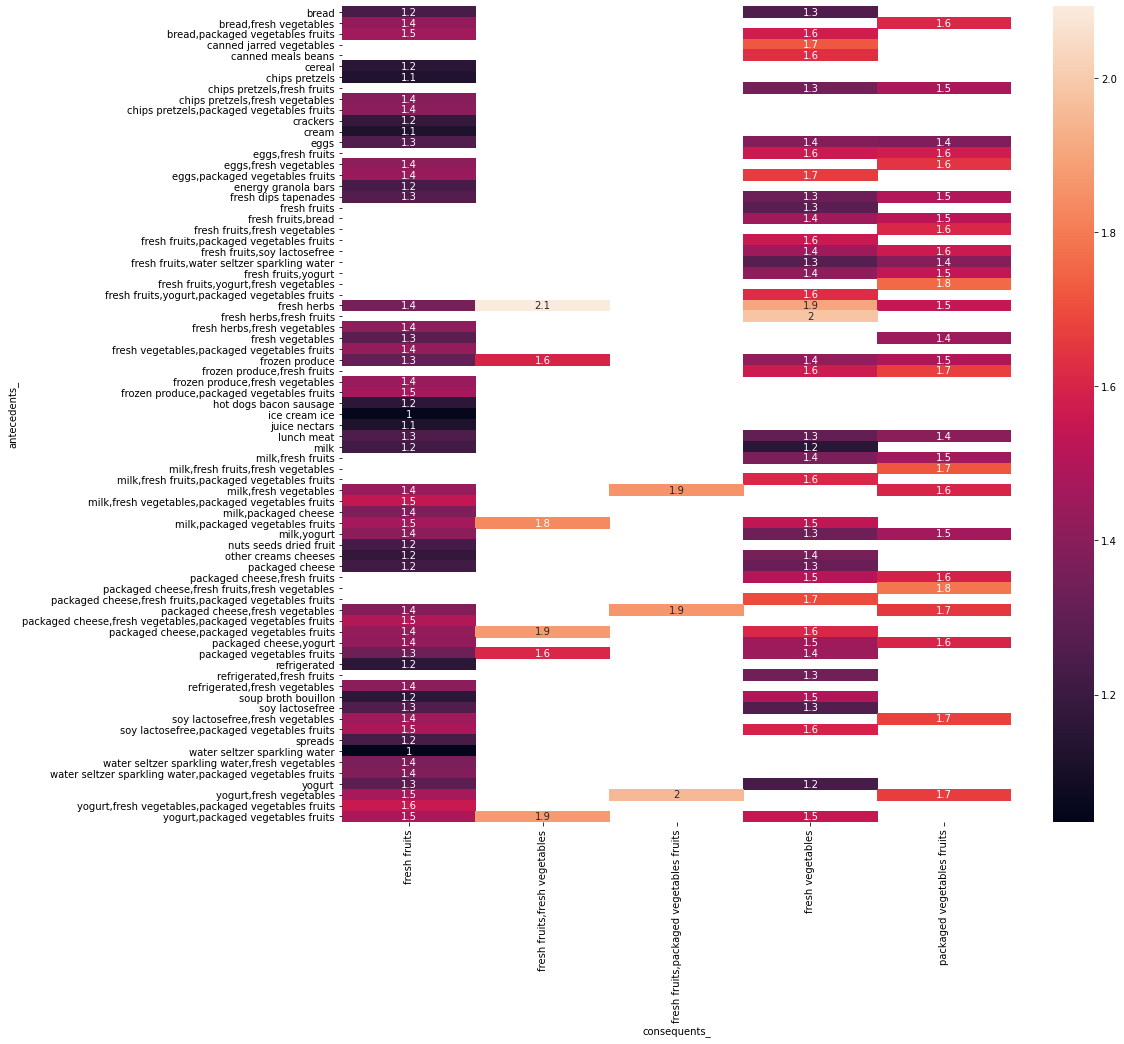

In [81]:
# Source: https://medium.com/swlh/a-tutorial-about-market-basket-analysis-in-python-predictive-hacks-497dc6e06b27

plt.figure(figsize=(15, 15))
baseline['antecedents_'] = baseline['antecedents'].apply(lambda a: ','.join(list(a)))
baseline['consequents_'] = baseline['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = baseline.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

<ipython-input-82-fbef9eb09545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher_baseline['antecedents_'] = higher_baseline['antecedents'].apply(lambda a: ','.join(list(a)))
<ipython-input-82-fbef9eb09545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher_baseline['consequents_'] = higher_baseline['consequents'].apply(lambda a: ','.join(list(a)))# Transform the DataFrame of rules into a matrix using the lift metric


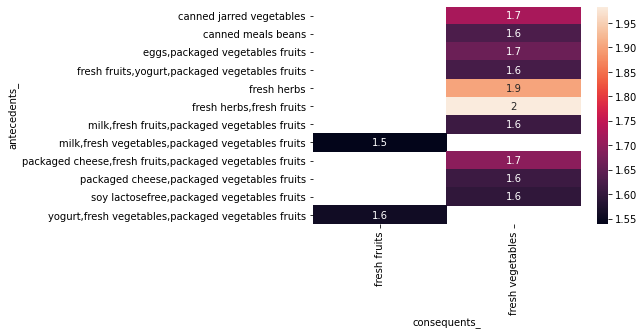

In [82]:
# Source: https://medium.com/swlh/a-tutorial-about-market-basket-analysis-in-python-predictive-hacks-497dc6e06b27

# Replace frozen sets with strings
higher_baseline['antecedents_'] = higher_baseline['antecedents'].apply(lambda a: ','.join(list(a)))
higher_baseline['consequents_'] = higher_baseline['consequents'].apply(lambda a: ','.join(list(a)))# Transform the DataFrame of rules into a matrix using the lift metric
pivot = higher_baseline.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### Plotting output in a graph plot

In [83]:
# Source: https://www.kaggle.com/yugagrawal95/market-basket-analysis-apriori-in-python

def draw_graph(rules, rules_to_show, fig_size_x, fig_size_y):
    G1 = nx.DiGraph()
    color_map=[]
    N = 200
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color='seagreen' , weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color='purple',  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('lightgreen')
        else:
            color_map.append('orchid')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    
    plt.figure(figsize=(fig_size_x, fig_size_y)) 

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=12, 
            with_labels=True)   

In [84]:
higher_baseline.shape

(12, 14)

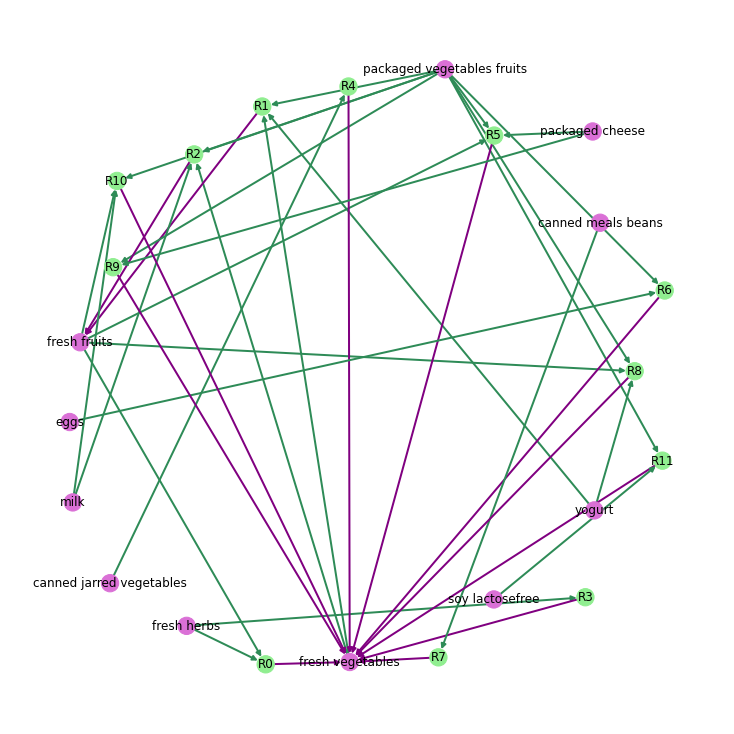

In [85]:
# plot for complementary products (confidence >=0.7 & lift >=1.5) - 12 rules (All)
draw_graph (higher_baseline, 12, 10, 10) 

In [86]:
rulesConfidence_cp.shape

(3, 9)

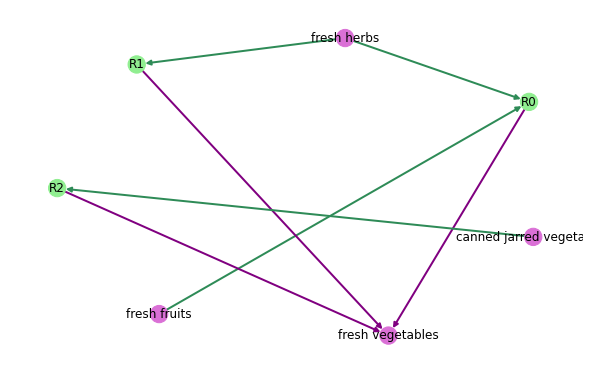

In [87]:
# plot for rulesConfidence_cp (complementary products -> confidence >=0.7 & lift>=1.7) - 3 rules
draw_graph (rulesConfidence_cp, 3, 8, 5) 

In [88]:
# Substitute products
subs_prod = rulesLift2[(rulesLift2['lift'] < 1.0)]
subs_prod

antecedents                      consequents  \
110  (water seltzer sparkling water)               (fresh vegetables)   
111               (fresh vegetables)  (water seltzer sparkling water)   

     antecedent support  consequent support   support  confidence      lift  \
110            0.193005            0.444360  0.083355    0.431880  0.971915   
111            0.444360            0.193005  0.083355    0.187584  0.971915   

     leverage  conviction  
110 -0.002409    0.978033  
111 -0.002409    0.993328

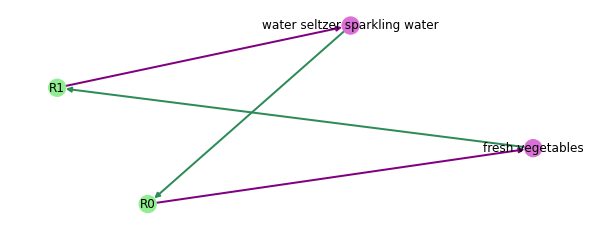

In [89]:
# plot for rulesLift2 (substitute products -> lift < 1) - 2
draw_graph (subs_prod, 2, 8, 3) 

In [90]:
rulesConfidence.shape

(386, 9)

In [91]:
rulesLift.shape

(384, 9)

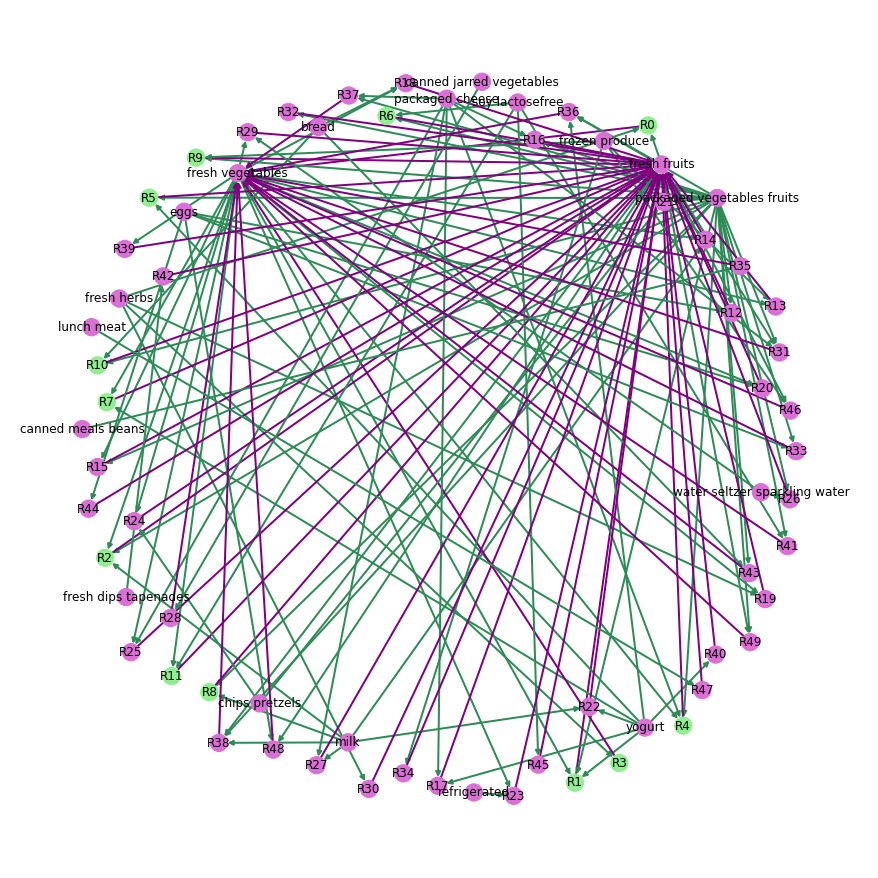

In [92]:
# plot for RulesConfidence - 50 rules
draw_graph (rulesConfidence, 50, 12, 12) 

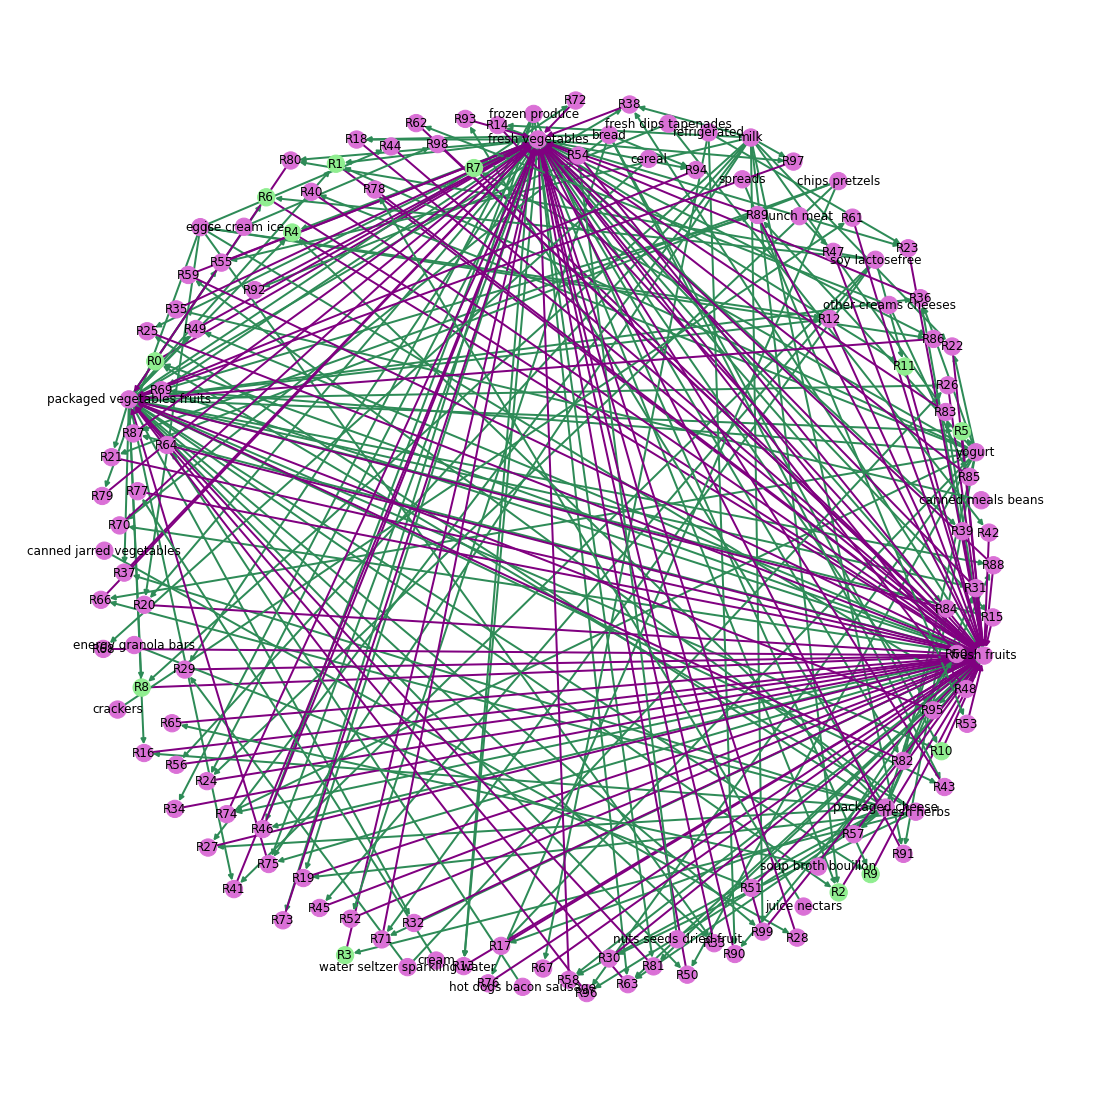

In [93]:
# plot for baseline - 50 rules
draw_graph (baseline, 100, 15, 15) 

**Notes regarding the previous visualizations:** <br>
It is clear that in all the visualizations regarding association rules by using different filters (i.e. complementary products, substitute products, confidence > 0.5, lift > 1) the consequents are always focused on fresh fruits, fresh vegetables and ultimately packed vegetables fruits. In this way, it is likely that by buying others products (i.e. fresh herbs, cheese, canned products, yogurt) the chances of buying these latter two are high.  

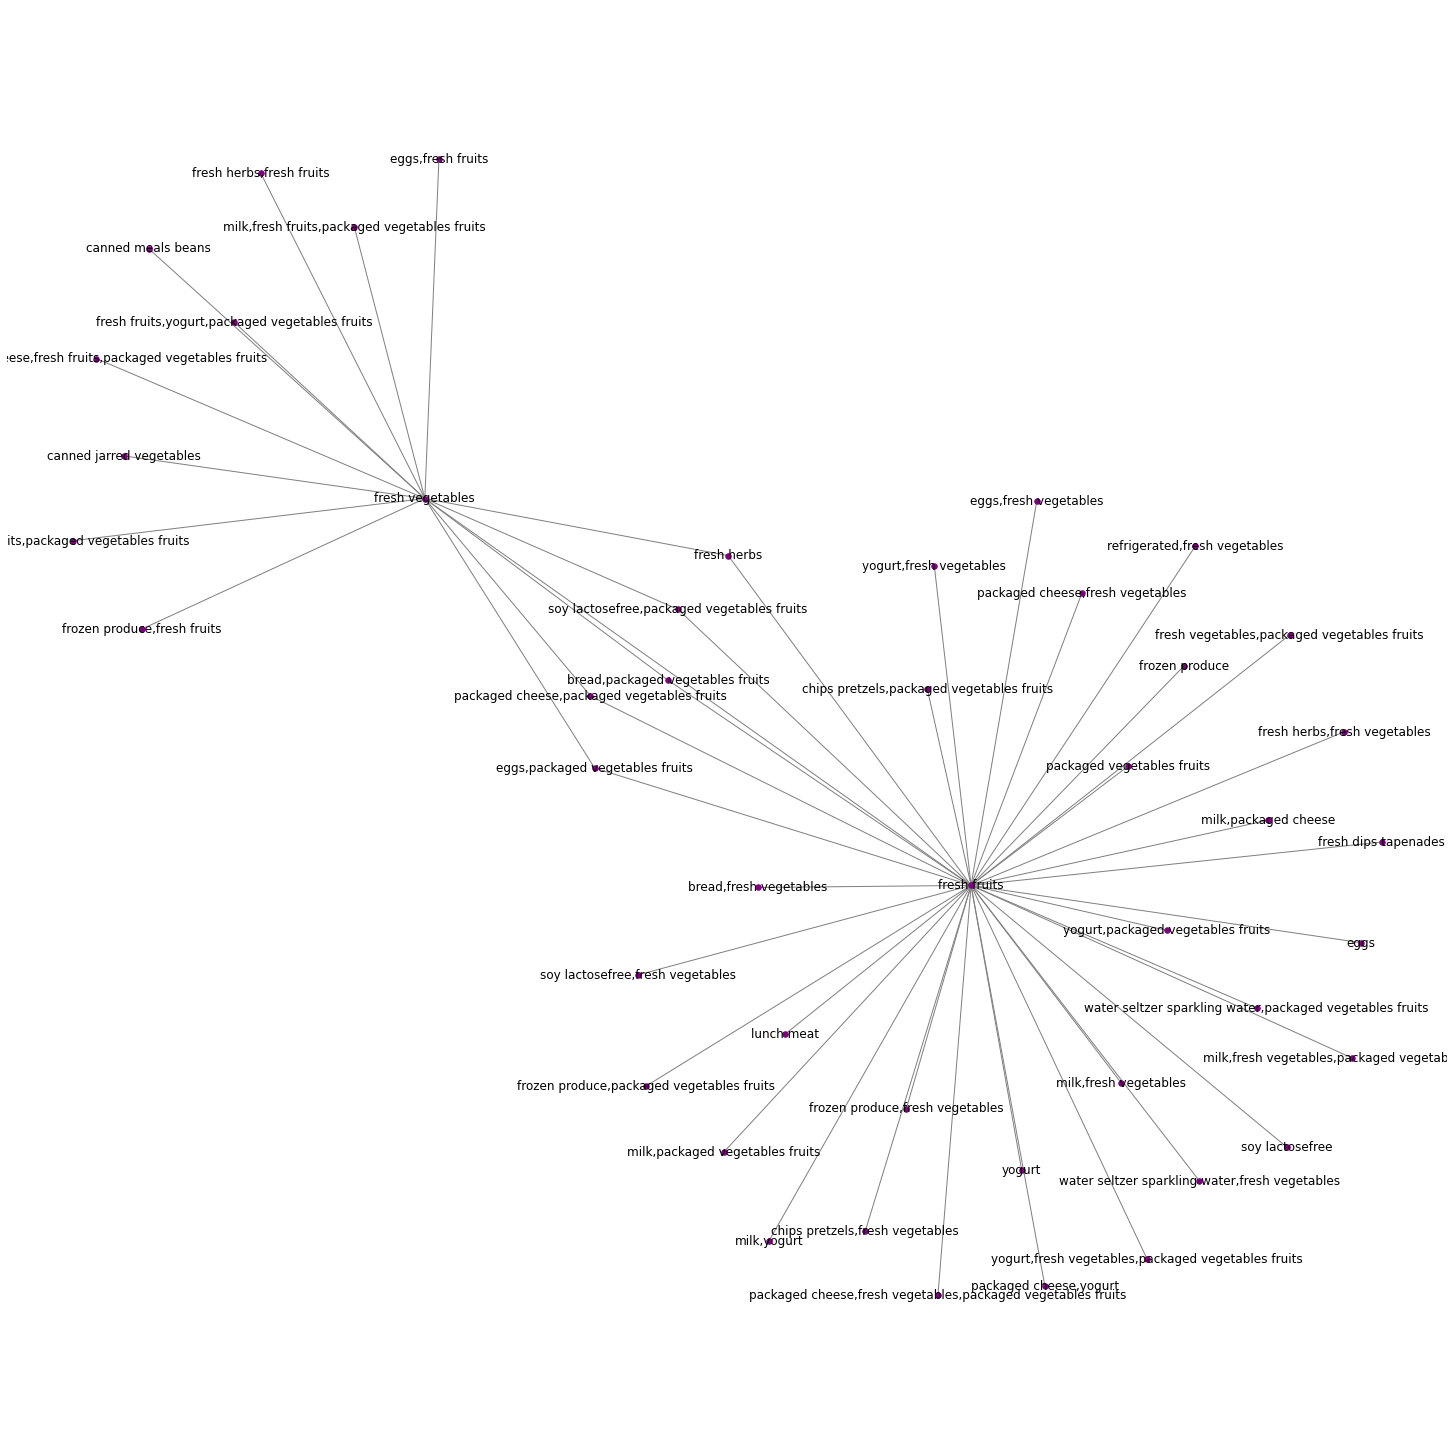

In [94]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]

fig = plt.figure(figsize=(20, 20)) 

G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
edges = G.edges()

# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, edges=edges, node_size=30, node_color="purple", edge_color='grey', pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('figure.svg')

**Notes on the previous visualization:** <br>
The chances of buying fresh fruits and fresh vegetables when buying the linked products to each node are very high and the contrary is also true.